In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

from collections import Counter

In [2]:
def read_twitter_data(file = 'json_file_location.json'):
    data_frame = pd.read_json(file, 
                               orient='records', 
                               lines=True, 
                               convert_dates=True, 
                               keep_default_dates=True)
    return data_frame

In [3]:
CSU = read_twitter_data(file = 'CSU/CSU_2018-07-08.json')

In [4]:
CSU.name = 'CSU'

In [5]:
AFD = read_twitter_data(file = 'AfD/AfD_2018-07-08.json')

In [6]:
AFD.name = 'AFD'

In [7]:
CDU = read_twitter_data(file = 'CDU/CDU_2018-07-08.json')

In [8]:
CDU.name = 'CDU'

In [9]:
Gruene = read_twitter_data(file = 'Gruene/Gruene_2018-07-08.json')

In [10]:
Gruene.name = 'Gruene'

In [11]:
SPD = read_twitter_data(file = 'SPD/SPD_2018-07-08.json')

In [12]:
SPD.name = 'SPD'

In [13]:
SPDDE = read_twitter_data(file = 'spdde/spdde_2018-07-08.json')

In [14]:
SPDDE.name = 'SPDDE'

In [15]:
Linke = read_twitter_data(file = 'LINKE/LINKE_2018-07-08.json')

In [16]:
Linke.name = 'LINKE'

In [17]:
FDP = read_twitter_data(file = 'FDP/FDP_2018-07-16.json')

In [18]:
FDP.name = 'FDP'

In [19]:
# CSU['lang'].value_counts()

In [20]:
list_dataframes = [CSU, AFD, CDU, Gruene, SPD, SPDDE, Linke, FDP]

In [21]:
def index(dataframes_list):
    for df in list_dataframes:
        df.set_index(pd.DatetimeIndex(df['created_at']), inplace=True)

In [22]:
index(list_dataframes)

In [23]:
def extract_location(x):
    """
    use with apply
    """
    return x['location']

In [24]:
def location_column(dataframe_list):
    """
    create a new column: 'location'
    """
    for df in dataframe_list:
        df['location'] = df.user.map(extract_location)

In [25]:
location_column(list_dataframes)

In [26]:
frames = dict()
def extract_languages(dataframes):
    """
    iterates over the list of dataframes and extracts the language column from each frame.
    value_counts outputs a key : value pair with language as key and value_counts per language as value
    value_counts output is assigned to an empty dictionary
    """
    
    for df in dataframes:                                     
         frames[str(df.name)] = (df.loc[:, 'lang'].value_counts(dropna = False))
    return frames

In [27]:
extract_languages(list_dataframes)

{'CSU': de     1881
 en      298
 tl      288
 und      52
 ja       51
 ko       39
 fr       24
 in       16
 nl       14
 ro       11
 fi       10
 es        5
 pt        4
 hu        3
 da        2
 ar        2
 et        2
 el        1
 lv        1
 pl        1
 no        1
 sv        1
 Name: lang, dtype: int64, 'AFD': de     8087
 en     1921
 fr      193
 nl      147
 und     126
 es       58
 ja       50
 pt       43
 fi       32
 da       21
 pl       20
 tr       14
 in       12
 ar       10
 ro        8
 it        7
 el        5
 cs        3
 sv        3
 vi        2
 no        2
 ur        2
 ko        2
 uk        2
 ca        1
 th        1
 cy        1
 et        1
 hu        1
 Name: lang, dtype: int64, 'CDU': de     1774
 en      134
 ja       20
 tl       19
 fr       19
 und      18
 es       13
 nl       12
 fi       10
 ro       10
 ca       10
 it        5
 pt        3
 ht        2
 pl        2
 da        2
 sv        1
 in        1
 Name: lang, dtype: int64, 'Gr

In [28]:
languages = pd.DataFrame.from_dict(frames)
languages.name = 'Languages'
languages.head()

,CSU,AFD,CDU,Gruene,SPD,SPDDE,LINKE,FDP
ar,2.0,10.0,NaN,NaN,3.0,NaN,1.0,NaN
ca,NaN,1.0,10.0,NaN,NaN,NaN,46.0,22.0
cs,NaN,3.0,NaN,NaN,13.0,NaN,NaN,1.0
cy,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
da,2.0,21.0,2.0,NaN,2.0,1.0,2.0,NaN


In [29]:
summe = np.sum(languages.loc[:, 'CSU'])
summe


2707.0

In [30]:
def relative_languages(x):
    xs = np.sum(x)
    y = x.values/xs
    return y

In [31]:
langs = languages.copy()

In [32]:
def calculate_relative_languages(df):
    for x in df:
        langs = df.apply(relative_languages)
        return langs
        

In [33]:
rel_langs = calculate_relative_languages(languages)
rel_langs.head()

,CSU,AFD,CDU,Gruene,SPD,SPDDE,LINKE,FDP
ar,0.000739,0.000928,NaN,NaN,0.000593,NaN,0.000323,NaN
ca,NaN,0.000093,0.004866,NaN,NaN,NaN,0.014843,0.003382
cs,NaN,0.000278,NaN,NaN,0.002572,NaN,NaN,0.000154
cy,NaN,0.000093,NaN,NaN,NaN,NaN,NaN,NaN
da,0.000739,0.001949,0.000973,NaN,0.000396,0.002088,0.000645,NaN


In [34]:
def sorting_plot(df):
    for column in df:
        # sort the columns by value - truncate to get the 5 most frequent languages
        sorteddf = df.loc[:,column].sort_values(ascending=False).reset_index()
        largest5 = sorteddf.truncate(after = 4)
        largest5.set_index('index', inplace = True)
        # calculate percentage of all other languages
        largest5.loc['other', :] = 1 - np.sum(largest5)
#         large5 = dict(largest5)
       # largest5 = largest5.pivot(columns=index)
#         print(large5)
        # plot
        plt.pie(largest5)
        plt.axis('equal')
        plt.title(str(column))
        plt.show()

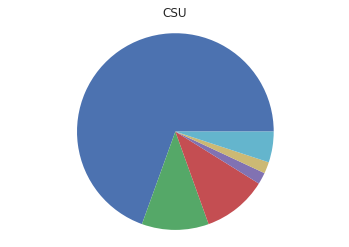

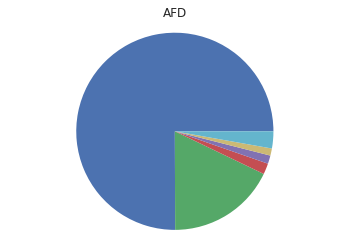

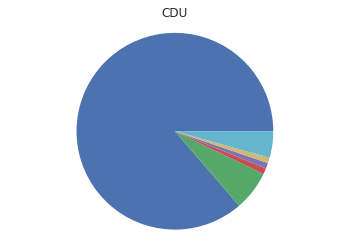

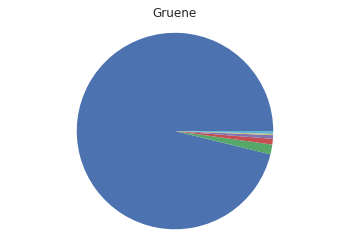

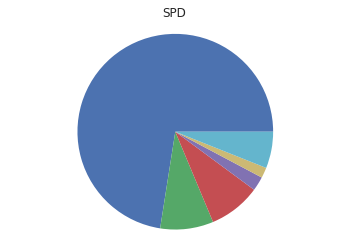

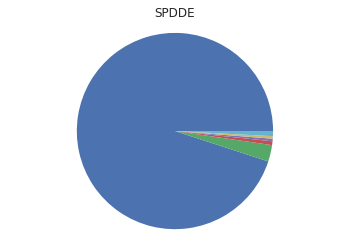

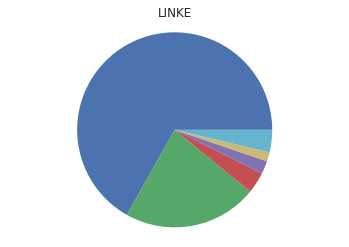

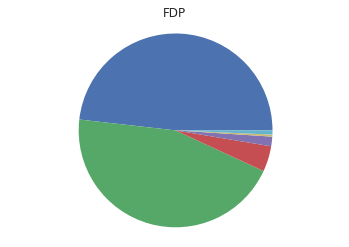

In [35]:
sorting_plot(rel_langs)

In [36]:
print(CSU.keys())

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user',
       'withheld_in_countries', 'withheld_scope', 'location'],
      dtype='object')


In [47]:
locations = CSU.loc[:, 'location'].reset_index()
print(np.unique(locations.loc[:, 'location']))
# plt.hist(locations)

['' ' ' ' Germany 🇩🇪 Europe 🇪🇺' ' HAMBURG, Germany, ' ' USA' ' 🌍 '
 '#DasDorfundich' '#PlanetErde' '#proEuropa 🇪🇺  #noAfD 🛑'
 '#wirsindneuland ' '* Köln,📖F,🎓&♥️Darm stadt,tbc'
 '1 575 🌟 ; yerim ; altair' '100 ⭐' '216' '22 Acacia Avenue, 666 Avalon'
 '35396 Gießen' '37.031887, -8.933263' '3rd planet of sol system'
 '48.847095,2.311192' '51°N 7°E' '52.373625,9.986435'
 '52.64770897,7.09344154' '53.59667552,9.93917009' '54.312268, 10.114769'
 '600 Main St. Windsor, CO 80550' '614.' '66100 Saarbrücken'
 '91743 Unterschwaningen' '93 millions miles from the sun' ':D' '@mundus'
 'ATLANTA ' 'AUC' 'Aachen' 'Aachen ' 'Aachen, Deutschland'
 'Aachen, Nordrhein-Westfalen' 'Absurdistan' 'Ahlen, Nordrhein-Westfalen'
 'Ahrweiler/Eifel' 'Alaska, USA' 'Alsace, France'
 "Always by Oneechan's side" 'Am Arsch' 'Am Meer' 'An der Leine '
 'An der blauen Linie' 'Anywhere' 'Anywhere in the landscape.'
 'Argentinien' 'Aspen, CO' 'Atlanta, GA' 'Atlanta, Georgia, USA'
 'Aubervilliers, France' 'Auf hoher See' 'Aug

In [61]:
def plots(dataframe, column):
    for df in dataframe:
        for column in df:
            plt.hist(df.loc[:, column])
            plt.title(str(df))
            plt.show()


ValueError: max must be larger than min in range parameter.

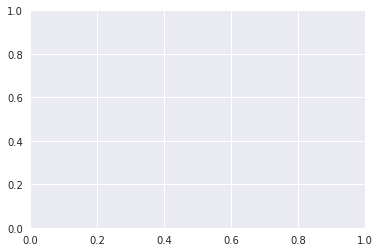

In [63]:
plots(list_dataframes, 'location')

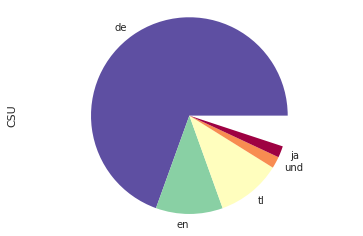

In [38]:
CSU_lang = rel_langs.loc[:, 'CSU'].nlargest(5)
CSU_lang.plot.pie(cmap = 'Spectral_r')
plt.axis('equal')
plt.show()

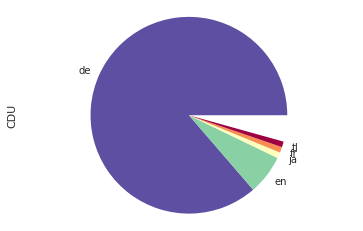

In [39]:
CDU_lang = rel_langs.loc[:, 'CDU'].nlargest(5)
CDU_lang.plot.pie(cmap = 'Spectral_r')
plt.axis('equal')
plt.show()

In [40]:
relative_language_CSU.head(5).plot.pie(cmap = 'Spectral_r')
plt.axis('equal')
plt.show()

NameError: name 'relative_language_CSU' is not defined

In [ ]:
# languages = [] # empty list
# language_proportion = [] # empty list that will contain dictionaries: {language: number of values}

In [ ]:
# def languages_per_df(dataframes):
    
#     """
#     returns a dictionary for every language:language_proportion pair in a dataframe 
#     -> list of dictionaries
#     """
    
#     for df in dataframes:
#         df.name = []
    

In [ ]:
# languages_per_df(list_dataframes)

In [ ]:
# def extract_languages(dataframes):
#     for df in dataframes:        
#         for language in df.loc[:, 'lang']:
#             if language in languages:
#                 languages[language] += 1
#             else:
#                 languages[language] = 1
#     return languages

In [ ]:
# extract_languages(list_dataframes)
# print(languages)

In [ ]:
        
            
            
#                 relative_language = languages.value_counts()/len(df.languages)
#         language_proportion[language].append(relative_language)
#     return language_proportion

In [ ]:
# language(list_dataframes)